In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import os

In [ ]:
import zipfile

zip_path = '/content/dataset2.zip'
extract_path = '/content/'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'File berhasil diekstrak ke {extract_path}')

File berhasil diekstrak ke /content/


In [ ]:
image_dir = '/content/dataset2'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    X, y,
    epochs=350,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 239474.2188 - mae: 437.5500
Epoch 1: loss improved from inf to 239474.21875, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 239474.2188 - mae: 437.5500
Epoch 2/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 228548.5625 - mae: 424.9078
Epoch 2: loss improved from 239474.21875 to 228548.56250, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 228548.5625 - mae: 424.9078
Epoch 3/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 205454.2344 - mae: 396.8768
Epoch 3: loss improved from 228548.56250 to 205454.23438, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 205454.2344 - mae: 396.8768
Epoch 4/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 163814.7344 - mae: 340.5671
Epoch 4: loss improved from 205454.23438 to 163814.73438, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 163814.7344 - mae: 340.5671
Epoch 5/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 103492.6406 - mae: 240.4410
Epoch 5: loss improved from 163814.73438 to 103492.64062, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 103492.6406 - mae: 240.4410
Epoch 6/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 49899.1250 - mae: 159.7499
Epoch 6: loss improved from 103492.64062 to 49899.12500, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 49899.1250 - mae: 159.7499
Epoch 7/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 103421.3594 - mae: 294.5399
Epoch 7: loss did not improve from 49899.12500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 103421.3594 - mae: 294.5399
Epoch 8/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 90104.4062 - mae: 275.8851
Epoch 8: loss did not improve from 49899.12500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 90104.4062 - mae: 275.8851
Epoch 9/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 55085.6094 - mae: 209.4445
Epoch 9: loss did not improve from 49899.12500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 55085.6094 - mae: 209.4445
Epoch 10/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 47026.7812 - mae: 167.3217
Epoch 10: loss improved from 49899.12500 to 47026.78125, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 47026.7812 - mae: 167.3217
Epoch 11/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 55202.6328 - mae: 153.8692
Epoch 11: loss did not improve from 47026.78125
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 55202.6328 - mae: 153.8692
Epoch 12/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 64061.9062 - mae: 162.9034
Epoch 12: loss did not improve from 47026.78125
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 64061.9062 - mae: 162.9034
Epoch 13/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 67666.0625 - mae: 169.1673
Epoch 13: loss did not improve from 47026.78125
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 67666.0625 - mae: 169.1673
Epoch 14/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 65384.4219 - mae: 165.3083
Epoch 14: loss did not improve from 47026.78125
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 65384.4219 - mae: 165.3083
Epoch 15/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 58828.4102 - mae: 156.7930
Epoch 15: loss did not improve fr

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45836.1914 - mae: 166.0422
Epoch 18/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 47102.9688 - mae: 187.4188
Epoch 18: loss did not improve from 45836.19141
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 47102.9688 - mae: 187.4188
Epoch 19/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 52873.9141 - mae: 205.5318
Epoch 19: loss did not improve from 45836.19141
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 52873.9141 - mae: 205.5318
Epoch 20/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 55612.4727 - mae: 212.7565
Epoch 20: loss did not improve from 45836.19141
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 55612.4727 - mae: 212.7565
Epoch 21/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 52284.5000 - mae: 204.2924
Epoch 21: loss did not improve from 45836.19141
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 52284.5000 - mae: 204.2924
Epoch 22/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 47109.4141 - mae: 188.8385
Epoch 22: loss did not improve fr

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 44644.1484 - mae: 173.0616
Epoch 24/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 45458.6875 - mae: 160.8163
Epoch 24: loss did not improve from 44644.14844
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45458.6875 - mae: 160.8163
Epoch 25/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 47525.1562 - mae: 154.9890
Epoch 25: loss did not improve from 44644.14844
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 47525.1562 - mae: 154.9890
Epoch 26/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 48908.7773 - mae: 153.4271
Epoch 26: loss did not improve from 44644.14844
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 48908.7773 - mae: 153.4271
Epoch 27/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 48702.6328 - mae: 153.3129
Epoch 27: loss did not improve from 44644.14844
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 48702.6328 - mae: 153.3129
Epoch 28/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 47075.8516 - mae: 154.4899
Epoch 28: loss did not improve fr

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 43581.0078 - mae: 166.0099
Epoch 31/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 43658.3594 - mae: 175.5645
Epoch 31: loss did not improve from 43581.00781
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 43658.3594 - mae: 175.5645
Epoch 32/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 44760.2109 - mae: 183.0372
Epoch 32: loss did not improve from 43581.00781
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 44760.2109 - mae: 183.0372
Epoch 33/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 45526.8203 - mae: 186.4179
Epoch 33: loss did not improve from 43581.00781
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45526.8203 - mae: 186.4179
Epoch 34/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 44931.8984 - mae: 184.5725
Epoch 34: loss did not improve from 43581.00781
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 44931.8984 - mae: 184.5725
Epoch 35/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 43522.8672 - mae: 178.5725
Epoch 35: loss improved from 4358

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 43522.8672 - mae: 178.5725
Epoch 36/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 42494.7031 - mae: 170.6681
Epoch 36: loss improved from 43522.86719 to 42494.70312, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 42494.7031 - mae: 170.6681
Epoch 37/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 42365.8047 - mae: 162.9651
Epoch 37: loss improved from 42494.70312 to 42365.80469, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 42365.8047 - mae: 162.9651
Epoch 38/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 42798.2852 - mae: 157.7278
Epoch 38: loss did not improve from 42365.80469
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 42798.2852 - mae: 157.7278
Epoch 39/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 43126.6953 - mae: 155.5249
Epoch 39: loss did not improve from 42365.80469
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 43126.6953 - mae: 155.5249
Epoch 40/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 42924.8320 - mae: 155.1744
Epoch 40: loss did not improve from 42365.80469
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 42924.8320 - mae: 155.1744
Epoch 41/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 42229.8906 - mae: 156.5122
Epoch 41: loss improved from 42365.80469 to 42229.89062, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 42229.8906 - mae: 156.5122
Epoch 42/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 41440.9492 - mae: 160.1024
Epoch 42: loss improved from 42229.89062 to 41440.94922, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 41440.9492 - mae: 160.1024
Epoch 43/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 41000.2422 - mae: 165.3166
Epoch 43: loss improved from 41440.94922 to 41000.24219, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 41000.2422 - mae: 165.3166
Epoch 44/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 41026.6172 - mae: 170.0681
Epoch 44: loss did not improve from 41000.24219
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 41026.6172 - mae: 170.0681
Epoch 45/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 41221.1562 - mae: 173.1310
Epoch 45: loss did not improve from 41000.24219
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 41221.1562 - mae: 173.1310
Epoch 46/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 41081.9453 - mae: 173.2478
Epoch 46: loss did not improve from 41000.24219
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 41081.9453 - mae: 173.2478
Epoch 47/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 40525.0039 - mae: 170.4252
Epoch 47: loss improved from 41000.24219 to 40525.00391, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 40525.0039 - mae: 170.4252
Epoch 48/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 39949.7109 - mae: 165.8407
Epoch 48: loss improved from 40525.00391 to 39949.71094, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 39949.7109 - mae: 165.8407
Epoch 49/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 39659.3984 - mae: 160.9671
Epoch 49: loss improved from 39949.71094 to 39659.39844, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 39659.3984 - mae: 160.9671
Epoch 50/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 39610.9219 - mae: 156.9405
Epoch 50: loss improved from 39659.39844 to 39610.92188, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 39610.9219 - mae: 156.9405
Epoch 51/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 39552.7188 - mae: 154.5604
Epoch 51: loss improved from 39610.92188 to 39552.71875, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 39552.7188 - mae: 154.5604
Epoch 52/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 39288.1875 - mae: 154.1285
Epoch 52: loss improved from 39552.71875 to 39288.18750, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 39288.1875 - mae: 154.1285
Epoch 53/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 38836.8047 - mae: 155.4774
Epoch 53: loss improved from 39288.18750 to 38836.80469, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 38836.8047 - mae: 155.4774
Epoch 54/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 38386.1094 - mae: 158.0241
Epoch 54: loss improved from 38836.80469 to 38386.10938, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 38386.1094 - mae: 158.0241
Epoch 55/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 38097.2500 - mae: 160.8608
Epoch 55: loss improved from 38386.10938 to 38097.25000, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 38097.2500 - mae: 160.8608
Epoch 56/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 37957.9609 - mae: 163.1119
Epoch 56: loss improved from 38097.25000 to 37957.96094, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 37957.9609 - mae: 163.1119
Epoch 57/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 37765.6562 - mae: 163.6367
Epoch 57: loss improved from 37957.96094 to 37765.65625, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 37765.6562 - mae: 163.6367
Epoch 58/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 37383.7031 - mae: 162.0645
Epoch 58: loss improved from 37765.65625 to 37383.70312, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 37383.7031 - mae: 162.0645
Epoch 59/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 36926.9141 - mae: 158.8948
Epoch 59: loss improved from 37383.70312 to 36926.91406, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 36926.9141 - mae: 158.8948
Epoch 60/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 36574.5234 - mae: 155.1760
Epoch 60: loss improved from 36926.91406 to 36574.52344, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 36574.5234 - mae: 155.1760
Epoch 61/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 36333.2383 - mae: 152.6753
Epoch 61: loss improved from 36574.52344 to 36333.23828, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 36333.2383 - mae: 152.6753
Epoch 62/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 36059.3320 - mae: 151.4979
Epoch 62: loss improved from 36333.23828 to 36059.33203, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 36059.3320 - mae: 151.4979
Epoch 63/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 35659.3945 - mae: 151.4036
Epoch 63: loss improved from 36059.33203 to 35659.39453, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 35659.3945 - mae: 151.4036
Epoch 64/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 35191.8125 - mae: 152.1981
Epoch 64: loss improved from 35659.39453 to 35191.81250, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 35191.8125 - mae: 152.1981
Epoch 65/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 34784.4727 - mae: 153.4035
Epoch 65: loss improved from 35191.81250 to 34784.47266, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 34784.4727 - mae: 153.4035
Epoch 66/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 34450.9219 - mae: 154.1770
Epoch 66: loss improved from 34784.47266 to 34450.92188, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 34450.9219 - mae: 154.1770
Epoch 67/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 34060.5508 - mae: 153.8689
Epoch 67: loss improved from 34450.92188 to 34060.55078, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 34060.5508 - mae: 153.8689
Epoch 68/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 33555.6211 - mae: 152.3435
Epoch 68: loss improved from 34060.55078 to 33555.62109, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 33555.6211 - mae: 152.3435
Epoch 69/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 33037.7109 - mae: 150.0522
Epoch 69: loss improved from 33555.62109 to 33037.71094, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 33037.7109 - mae: 150.0522
Epoch 70/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 32569.9199 - mae: 147.7369
Epoch 70: loss improved from 33037.71094 to 32569.91992, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 32569.9199 - mae: 147.7369
Epoch 71/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 32072.5762 - mae: 146.0239
Epoch 71: loss improved from 32569.91992 to 32072.57617, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 32072.5762 - mae: 146.0239
Epoch 72/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 31437.5723 - mae: 145.1304
Epoch 72: loss improved from 32072.57617 to 31437.57227, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 31437.5723 - mae: 145.1304
Epoch 73/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 30680.5801 - mae: 144.7257
Epoch 73: loss improved from 31437.57227 to 30680.58008, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 30680.5801 - mae: 144.7257
Epoch 74/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 29887.0469 - mae: 144.1470
Epoch 74: loss improved from 30680.58008 to 29887.04688, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 29887.0469 - mae: 144.1470
Epoch 75/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 29093.6641 - mae: 142.7943
Epoch 75: loss improved from 29887.04688 to 29093.66406, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 29093.6641 - mae: 142.7943
Epoch 76/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 28259.8105 - mae: 140.4996
Epoch 76: loss improved from 29093.66406 to 28259.81055, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 28259.8105 - mae: 140.4996
Epoch 77/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 27396.5078 - mae: 137.4474
Epoch 77: loss improved from 28259.81055 to 27396.50781, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 27396.5078 - mae: 137.4474
Epoch 78/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 26561.1562 - mae: 134.2646
Epoch 78: loss improved from 27396.50781 to 26561.15625, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 26561.1562 - mae: 134.2646
Epoch 79/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 25632.5234 - mae: 132.5537
Epoch 79: loss improved from 26561.15625 to 25632.52344, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 25632.5234 - mae: 132.5537
Epoch 80/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 24620.0918 - mae: 131.4884
Epoch 80: loss improved from 25632.52344 to 24620.09180, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 24620.0918 - mae: 131.4884
Epoch 81/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 23596.8418 - mae: 129.4973
Epoch 81: loss improved from 24620.09180 to 23596.84180, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 23596.8418 - mae: 129.4973
Epoch 82/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 22449.4023 - mae: 125.3446
Epoch 82: loss improved from 23596.84180 to 22449.40234, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 22449.4023 - mae: 125.3446
Epoch 83/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 21347.5820 - mae: 119.3490
Epoch 83: loss improved from 22449.40234 to 21347.58203, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 21347.5820 - mae: 119.3490
Epoch 84/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 20326.1172 - mae: 113.9810
Epoch 84: loss improved from 21347.58203 to 20326.11719, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 20326.1172 - mae: 113.9810
Epoch 85/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 19138.6602 - mae: 110.6326
Epoch 85: loss improved from 20326.11719 to 19138.66016, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 19138.6602 - mae: 110.6326
Epoch 86/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 18052.8242 - mae: 110.6924
Epoch 86: loss improved from 19138.66016 to 18052.82422, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 18052.8242 - mae: 110.6924
Epoch 87/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 17011.8457 - mae: 107.9739
Epoch 87: loss improved from 18052.82422 to 17011.84570, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17011.8457 - mae: 107.9739
Epoch 88/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 15988.6436 - mae: 99.0344
Epoch 88: loss improved from 17011.84570 to 15988.64355, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 15988.6436 - mae: 99.0344
Epoch 89/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 15211.4600 - mae: 93.5905
Epoch 89: loss improved from 15988.64355 to 15211.45996, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 15211.4600 - mae: 93.5905
Epoch 90/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 14349.4590 - mae: 92.2415
Epoch 90: loss improved from 15211.45996 to 14349.45898, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14349.4590 - mae: 92.2415
Epoch 91/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 13938.7275 - mae: 95.6922
Epoch 91: loss improved from 14349.45898 to 13938.72754, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13938.7275 - mae: 95.6922
Epoch 92/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 13230.2783 - mae: 86.4719
Epoch 92: loss improved from 13938.72754 to 13230.27832, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13230.2783 - mae: 86.4719
Epoch 93/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 12465.6816 - mae: 85.4535
Epoch 93: loss improved from 13230.27832 to 12465.68164, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12465.6816 - mae: 85.4535
Epoch 94/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 12121.9805 - mae: 86.8018
Epoch 94: loss improved from 12465.68164 to 12121.98047, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 12121.9805 - mae: 86.8018
Epoch 95/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 11529.8027 - mae: 81.0050
Epoch 95: loss improved from 12121.98047 to 11529.80273, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 11529.8027 - mae: 81.0050
Epoch 96/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 10959.2422 - mae: 79.5824
Epoch 96: loss improved from 11529.80273 to 10959.24219, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10959.2422 - mae: 79.5824
Epoch 97/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 10637.5078 - mae: 79.8944
Epoch 97: loss improved from 10959.24219 to 10637.50781, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 10637.5078 - mae: 79.8944
Epoch 98/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 10065.8760 - mae: 75.6574
Epoch 98: loss improved from 10637.50781 to 10065.87598, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 10065.8760 - mae: 75.6574
Epoch 99/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 9341.7031 - mae: 73.0757
Epoch 99: loss improved from 10065.87598 to 9341.70312, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 9341.7031 - mae: 73.0757
Epoch 100/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8842.5996 - mae: 70.1612
Epoch 100: loss improved from 9341.70312 to 8842.59961, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8842.5996 - mae: 70.1612
Epoch 101/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8365.7656 - mae: 67.1830
Epoch 101: loss improved from 8842.59961 to 8365.76562, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8365.7656 - mae: 67.1830
Epoch 102/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7705.8193 - mae: 64.4421
Epoch 102: loss improved from 8365.76562 to 7705.81934, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7705.8193 - mae: 64.4421
Epoch 103/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7154.1133 - mae: 61.4548
Epoch 103: loss improved from 7705.81934 to 7154.11328, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 7154.1133 - mae: 61.4548
Epoch 104/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 6813.0352 - mae: 59.0116
Epoch 104: loss improved from 7154.11328 to 6813.03516, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6813.0352 - mae: 59.0116
Epoch 105/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 6432.7119 - mae: 58.0420
Epoch 105: loss improved from 6813.03516 to 6432.71191, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6432.7119 - mae: 58.0420
Epoch 106/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 5923.3071 - mae: 54.4361
Epoch 106: loss improved from 6432.71191 to 5923.30713, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5923.3071 - mae: 54.4361
Epoch 107/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 5494.4683 - mae: 52.6689
Epoch 107: loss improved from 5923.30713 to 5494.46826, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 5494.4683 - mae: 52.6689
Epoch 108/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5202.9512 - mae: 52.7379
Epoch 108: loss improved from 5494.46826 to 5202.95117, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5202.9512 - mae: 52.7379
Epoch 109/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4895.5635 - mae: 49.5594
Epoch 109: loss improved from 5202.95117 to 4895.56348, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4895.5635 - mae: 49.5594
Epoch 110/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4518.3408 - mae: 50.5405
Epoch 110: loss improved from 4895.56348 to 4518.34082, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4518.3408 - mae: 50.5405
Epoch 111/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 4145.8081 - mae: 46.0943
Epoch 111: loss improved from 4518.34082 to 4145.80811, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4145.8081 - mae: 46.0943
Epoch 112/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 3845.4690 - mae: 45.4242
Epoch 112: loss improved from 4145.80811 to 3845.46899, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 3845.4690 - mae: 45.4242
Epoch 113/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3602.1665 - mae: 44.5843
Epoch 113: loss improved from 3845.46899 to 3602.16650, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3602.1665 - mae: 44.5843
Epoch 114/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3445.1863 - mae: 42.6713
Epoch 114: loss improved from 3602.16650 to 3445.18628, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3445.1863 - mae: 42.6713
Epoch 115/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3483.7329 - mae: 46.3911
Epoch 115: loss did not improve from 3445.18628
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3483.7329 - mae: 46.3911
Epoch 116/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 4008.6777 - mae: 48.7763
Epoch 116: loss did not improve from 3445.18628
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 4008.6777 - mae: 48.7763
Epoch 117/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 4990.1748 - mae: 58.7683
Epoch 117: loss did not improve from 3445.18628
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4990.1748 - mae: 58.7683
Epoch 118/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5119.7734 - mae: 58.5506
Epoch 118: loss did not improve from 3445.18628
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5119.7734 - mae: 58.5506
Epoch 119/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2796.9834 - mae: 41.7916
Epoch 119: loss improved from 3445.18628 to 2796

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2796.9834 - mae: 41.7916
Epoch 120/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2914.3584 - mae: 43.6883
Epoch 120: loss did not improve from 2796.98340
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2914.3584 - mae: 43.6883
Epoch 121/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3943.9155 - mae: 50.7105
Epoch 121: loss did not improve from 2796.98340
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3943.9155 - mae: 50.7105
Epoch 122/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2267.6943 - mae: 37.1359
Epoch 122: loss improved from 2796.98340 to 2267.69434, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2267.6943 - mae: 37.1359
Epoch 123/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2643.5244 - mae: 41.6896
Epoch 123: loss did not improve from 2267.69434
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2643.5244 - mae: 41.6896
Epoch 124/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3026.1963 - mae: 43.5629
Epoch 124: loss did not improve from 2267.69434
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3026.1963 - mae: 43.5629
Epoch 125/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1647.8822 - mae: 30.7246
Epoch 125: loss improved from 2267.69434 to 1647.88220, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1647.8822 - mae: 30.7246
Epoch 126/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 2519.6147 - mae: 42.2576
Epoch 126: loss did not improve from 1647.88220
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 2519.6147 - mae: 42.2576
Epoch 127/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2274.4766 - mae: 37.5693
Epoch 127: loss did not improve from 1647.88220
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2274.4766 - mae: 37.5693
Epoch 128/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1305.5564 - mae: 26.4721
Epoch 128: loss improved from 1647.88220 to 1305.55640, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1305.5564 - mae: 26.4721
Epoch 129/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2291.2808 - mae: 40.6886
Epoch 129: loss did not improve from 1305.55640
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2291.2808 - mae: 40.6886
Epoch 130/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1651.4204 - mae: 31.3875
Epoch 130: loss did not improve from 1305.55640
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1651.4204 - mae: 31.3875
Epoch 131/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1149.1068 - mae: 25.2057
Epoch 131: loss improved from 1305.55640 to 1149.10681, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1149.1068 - mae: 25.2057
Epoch 132/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1913.5059 - mae: 37.2672
Epoch 132: loss did not improve from 1149.10681
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1913.5059 - mae: 37.2672
Epoch 133/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1083.7600 - mae: 24.3749
Epoch 133: loss improved from 1149.10681 to 1083.76001, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1083.7600 - mae: 24.3749
Epoch 134/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 1058.5170 - mae: 24.4366
Epoch 134: loss improved from 1083.76001 to 1058.51697, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 1058.5170 - mae: 24.4366
Epoch 135/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1440.3112 - mae: 32.0446
Epoch 135: loss did not improve from 1058.51697
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1440.3112 - mae: 32.0446
Epoch 136/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 712.8829 - mae: 19.6990
Epoch 136: loss improved from 1058.51697 to 712.88293, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 712.8829 - mae: 19.6990
Epoch 137/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 912.3975 - mae: 23.2739
Epoch 137: loss did not improve from 712.88293
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 912.3975 - mae: 23.2739
Epoch 138/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 968.8295 - mae: 26.1041
Epoch 138: loss did not improve from 712.88293
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 968.8295 - mae: 26.1041
Epoch 139/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 485.1665 - mae: 16.0812
Epoch 139: loss improved from 712.88293 to 485.16650, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 485.1665 - mae: 16.0812
Epoch 140/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 735.4711 - mae: 21.2904
Epoch 140: loss did not improve from 485.16650
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 735.4711 - mae: 21.2904
Epoch 141/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 594.0804 - mae: 20.4059
Epoch 141: loss did not improve from 485.16650
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 594.0804 - mae: 20.4059
Epoch 142/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 344.5272 - mae: 13.9306
Epoch 142: loss improved from 485.16650 to 344.52722, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 344.5272 - mae: 13.9306
Epoch 143/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 546.6693 - mae: 18.8450
Epoch 143: loss did not improve from 344.52722
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 546.6693 - mae: 18.8450
Epoch 144/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 366.4799 - mae: 15.8027
Epoch 144: loss did not improve from 344.52722
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 366.4799 - mae: 15.8027
Epoch 145/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 244.2559 - mae: 12.0583
Epoch 145: loss improved from 344.52722 to 244.25591, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 244.2559 - mae: 12.0583
Epoch 146/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 388.0681 - mae: 16.2998
Epoch 146: loss did not improve from 244.25591
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 388.0681 - mae: 16.2998
Epoch 147/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 294.7603 - mae: 13.8778
Epoch 147: loss did not improve from 244.25591
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 294.7603 - mae: 13.8778
Epoch 148/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 154.0495 - mae: 9.6821
Epoch 148: loss improved from 244.25591 to 154.04950, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 154.0495 - mae: 9.6821
Epoch 149/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 138.8731 - mae: 9.5725
Epoch 149: loss improved from 154.04950 to 138.87308, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 138.8731 - mae: 9.5725
Epoch 150/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 177.6127 - mae: 10.4162
Epoch 150: loss did not improve from 138.87308
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 177.6127 - mae: 10.4162
Epoch 151/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 128.5302 - mae: 9.6582
Epoch 151: loss improved from 138.87308 to 128.53015, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 128.5302 - mae: 9.6582
Epoch 152/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 70.9392 - mae: 6.6983
Epoch 152: loss improved from 128.53015 to 70.93918, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 70.9392 - mae: 6.6983
Epoch 153/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 99.1957 - mae: 7.3139
Epoch 153: loss did not improve from 70.93918
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 99.1957 - mae: 7.3139
Epoch 154/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 99.2159 - mae: 8.4157
Epoch 154: loss did not improve from 70.93918
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 99.2159 - mae: 8.4157
Epoch 155/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 45.6503 - mae: 5.2278
Epoch 155: loss improved from 70.93918 to 45.65028, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45.6503 - mae: 5.2278
Epoch 156/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 45.7741 - mae: 4.9182
Epoch 156: loss did not improve from 45.65028
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45.7741 - mae: 4.9182
Epoch 157/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 69.8577 - mae: 7.2300
Epoch 157: loss did not improve from 45.65028
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 69.8577 - mae: 7.2300
Epoch 158/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 42.4352 - mae: 4.7176
Epoch 158: loss improved from 45.65028 to 42.43522, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 42.4352 - mae: 4.7176
Epoch 159/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 18.7316 - mae: 3.4004
Epoch 159: loss improved from 42.43522 to 18.73163, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 18.7316 - mae: 3.4004
Epoch 160/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 35.5948 - mae: 5.2954
Epoch 160: loss did not improve from 18.73163
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 35.5948 - mae: 5.2954
Epoch 161/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 39.0204 - mae: 5.1551
Epoch 161: loss did not improve from 18.73163
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 39.0204 - mae: 5.1551
Epoch 162/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 16.3852 - mae: 3.5469
Epoch 162: loss improved from 18.73163 to 16.38516, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 16.3852 - mae: 3.5469
Epoch 163/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 10.9249 - mae: 2.7344
Epoch 163: loss improved from 16.38516 to 10.92487, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.9249 - mae: 2.7344
Epoch 164/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 25.2859 - mae: 4.1313
Epoch 164: loss did not improve from 10.92487
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 25.2859 - mae: 4.1313
Epoch 165/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 25.3285 - mae: 4.4425
Epoch 165: loss did not improve from 10.92487
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 25.3285 - mae: 4.4425
Epoch 166/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 9.7249 - mae: 2.7100
Epoch 166: loss improved from 10.92487 to 9.72493, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9.7249 - mae: 2.7100
Epoch 167/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7.3000 - mae: 2.4104
Epoch 167: loss improved from 9.72493 to 7.30005, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.3000 - mae: 2.4104
Epoch 168/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 17.3897 - mae: 3.5243
Epoch 168: loss did not improve from 7.30005
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.3897 - mae: 3.5243
Epoch 169/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 17.1327 - mae: 3.6077
Epoch 169: loss did not improve from 7.30005
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.1327 - mae: 3.6077
Epoch 170/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7.1687 - mae: 2.0646
Epoch 170: loss improved from 7.30005 to 7.16869, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.1687 - mae: 2.0646
Epoch 171/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.5741 - mae: 1.7943
Epoch 171: loss improved from 7.16869 to 5.57406, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.5741 - mae: 1.7943
Epoch 172/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 12.2832 - mae: 3.0751
Epoch 172: loss did not improve from 5.57406
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 12.2832 - mae: 3.0751
Epoch 173/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 12.7305 - mae: 3.0582
Epoch 173: loss did not improve from 5.57406
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.7305 - mae: 3.0582
Epoch 174/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.6856 - mae: 1.9375
Epoch 174: loss did not improve from 5.57406
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5.6856 - mae: 1.9375
Epoch 175/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.2947 - mae: 1.3654
Epoch 175: loss improved from 5.57406 to 3.29474, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.2947 - mae: 1.3654
Epoch 176/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 7.2232 - mae: 2.3676
Epoch 176: loss did not improve from 3.29474
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7.2232 - mae: 2.3676
Epoch 177/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8.3338 - mae: 2.5030
Epoch 177: loss did not improve from 3.29474
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.3338 - mae: 2.5030
Epoch 178/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.1952 - mae: 1.8456
Epoch 178: loss did not improve from 3.29474
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.1952 - mae: 1.8456
Epoch 179/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.4178 - mae: 1.0104
Epoch 179: loss improved from 3.29474 to 1.41781, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.4178 - mae: 1.0104
Epoch 180/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.2864 - mae: 1.4560
Epoch 180: loss did not improve from 1.41781
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.2864 - mae: 1.4560
Epoch 181/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 5.3217 - mae: 2.0924
Epoch 181: loss did not improve from 1.41781
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.3217 - mae: 2.0924
Epoch 182/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 3.7819 - mae: 1.7030
Epoch 182: loss did not improve from 1.41781
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 3.7819 - mae: 1.7030
Epoch 183/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.1179 - mae: 0.8677
Epoch 183: loss improved from 1.41781 to 1.11789, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.1179 - mae: 0.8677
Epoch 184/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.9673 - mae: 0.7632
Epoch 184: loss improved from 1.11789 to 0.96734, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.9673 - mae: 0.7632
Epoch 185/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.7472 - mae: 1.4587
Epoch 185: loss did not improve from 0.96734
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.7472 - mae: 1.4587
Epoch 186/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3.3673 - mae: 1.6333
Epoch 186: loss did not improve from 0.96734
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.3673 - mae: 1.6333
Epoch 187/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.9477 - mae: 1.1799
Epoch 187: loss did not improve from 0.96734
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.9477 - mae: 1.1799
Epoch 188/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.6385 - mae: 0.6743
Epoch 188: loss improved from 0.96734 to 0.63849, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6385 - mae: 0.6743
Epoch 189/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.9986 - mae: 0.8259
Epoch 189: loss did not improve from 0.63849
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9986 - mae: 0.8259
Epoch 190/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.0882 - mae: 1.2560
Epoch 190: loss did not improve from 0.63849
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0882 - mae: 1.2560
Epoch 191/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.2516 - mae: 1.3327
Epoch 191: loss did not improve from 0.63849
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.2516 - mae: 1.3327
Epoch 192/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 1.3198 - mae: 0.9536
Epoch 192: loss did not improve from 0.63849
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.3198 - mae: 0.9536
Epoch 193/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.5012 - mae: 0.5933
Epoch 193: loss improved from 0.63849 to 0.50118, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5012 - mae: 0.5933
Epoch 194/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.6215 - mae: 0.6623
Epoch 194: loss did not improve from 0.50118
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6215 - mae: 0.6623
Epoch 195/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.2689 - mae: 0.9414
Epoch 195: loss did not improve from 0.50118
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.2689 - mae: 0.9414
Epoch 196/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.5352 - mae: 1.1120
Epoch 196: loss did not improve from 0.50118
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.5352 - mae: 1.1120
Epoch 197/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 1.1159 - mae: 0.8739
Epoch 197: loss did not improve from 0.50118
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.1159 - mae: 0.8739
Epoch 198/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.5044 - mae: 0.5755
Epoch 198: loss did not improve from 0.50118
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5044 - ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2835 - mae: 0.4194
Epoch 200/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.5260 - mae: 0.5841
Epoch 200: loss did not improve from 0.28355
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5260 - mae: 0.5841
Epoch 201/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.8438 - mae: 0.8219
Epoch 201: loss did not improve from 0.28355
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.8438 - mae: 0.8219
Epoch 202/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.8648 - mae: 0.8295
Epoch 202: loss did not improve from 0.28355
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.8648 - mae: 0.8295
Epoch 203/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.5760 - mae: 0.6773
Epoch 203: loss did not improve from 0.28355
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5760 - mae: 0.6773
Epoch 204/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.2387 - mae: 0.3903
Epoch 204: loss improved from 0.28355 to 0.23873, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2387 - mae: 0.3903
Epoch 205/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1033 - mae: 0.2521
Epoch 205: loss improved from 0.23873 to 0.10332, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1033 - mae: 0.2521
Epoch 206/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.2037 - mae: 0.3781
Epoch 206: loss did not improve from 0.10332
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2037 - mae: 0.3781
Epoch 207/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.3875 - mae: 0.5653
Epoch 207: loss did not improve from 0.10332
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3875 - mae: 0.5653
Epoch 208/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.4806 - mae: 0.6495
Epoch 208: loss did not improve from 0.10332
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4806 - mae: 0.6495
Epoch 209/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.4156 - mae: 0.5907
Epoch 209: loss did not improve from 0.10332
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4156 - mae: 0.5907
Epoch 210/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.2525 - mae: 0.4555
Epoch 210: loss did not improve from 0.10332
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2525 - ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1007 - mae: 0.2754
Epoch 212/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0390 - mae: 0.1736
Epoch 212: loss improved from 0.10074 to 0.03905, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0390 - mae: 0.1736
Epoch 213/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0756 - mae: 0.2138
Epoch 213: loss did not improve from 0.03905
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0756 - mae: 0.2138
Epoch 214/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1615 - mae: 0.3559
Epoch 214: loss did not improve from 0.03905
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1615 - mae: 0.3559
Epoch 215/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.2340 - mae: 0.4375
Epoch 215: loss did not improve from 0.03905
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2340 - mae: 0.4375
Epoch 216/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.2526 - mae: 0.4713
Epoch 216: loss did not improve from 0.03905
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2526 - mae: 0.4713
Epoch 217/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.2154 - mae: 0.4214
Epoch 217: loss did not improve from 0.03905
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2154 - ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0318 - mae: 0.1390
Epoch 221/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0180 - mae: 0.1021
Epoch 221: loss improved from 0.03182 to 0.01801, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0180 - mae: 0.1021
Epoch 222/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0309 - mae: 0.1527
Epoch 222: loss did not improve from 0.01801
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0309 - mae: 0.1527
Epoch 223/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0594 - mae: 0.2094
Epoch 223: loss did not improve from 0.01801
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0594 - mae: 0.2094
Epoch 224/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0921 - mae: 0.2841
Epoch 224: loss did not improve from 0.01801
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0921 - mae: 0.2841
Epoch 225/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1208 - mae: 0.3282
Epoch 225: loss did not improve from 0.01801
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1208 - mae: 0.3282
Epoch 226/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1418 - mae: 0.3630
Epoch 226: loss did not improve from 0.01801
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1418 - ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0101 - mae: 0.0702
Epoch 328/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1412 - mae: 0.3582
Epoch 328: loss did not improve from 0.01009
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1412 - mae: 0.3582
Epoch 329/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.4261 - mae: 0.6491
Epoch 329: loss did not improve from 0.01009
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4261 - mae: 0.6491
Epoch 330/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.5546 - mae: 0.7346
Epoch 330: loss did not improve from 0.01009
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5546 - mae: 0.7346
Epoch 331/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.4193 - mae: 0.6406
Epoch 331: loss did not improve from 0.01009
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4193 - mae: 0.6406
Epoch 332/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1681 - mae: 0.4049
Epoch 332: loss did not improve from 0.01009
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1681 - ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0035 - mae: 0.0451
Epoch 341/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0306 - mae: 0.1688
Epoch 341: loss did not improve from 0.00349
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0306 - mae: 0.1688
Epoch 342/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1004 - mae: 0.3092
Epoch 342: loss did not improve from 0.00349
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1004 - mae: 0.3092
Epoch 343/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1556 - mae: 0.3905
Epoch 343: loss did not improve from 0.00349
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1556 - mae: 0.3905
Epoch 344/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1617 - mae: 0.3978
Epoch 344: loss did not improve from 0.00349
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1617 - mae: 0.3978
Epoch 345/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1206 - mae: 0.3420
Epoch 345: loss did not improve from 0.00349
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1206 - ma

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.7474e-04 - mae: 0.0242
Epoch 349/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0164 - mae: 0.1261
Epoch 349: loss did not improve from 0.00087
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0164 - mae: 0.1261
Epoch 350/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0463 - mae: 0.2128
Epoch 350: loss did not improve from 0.00087
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0463 - mae: 0.2128


File berhasil diekstrak ke /content/


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


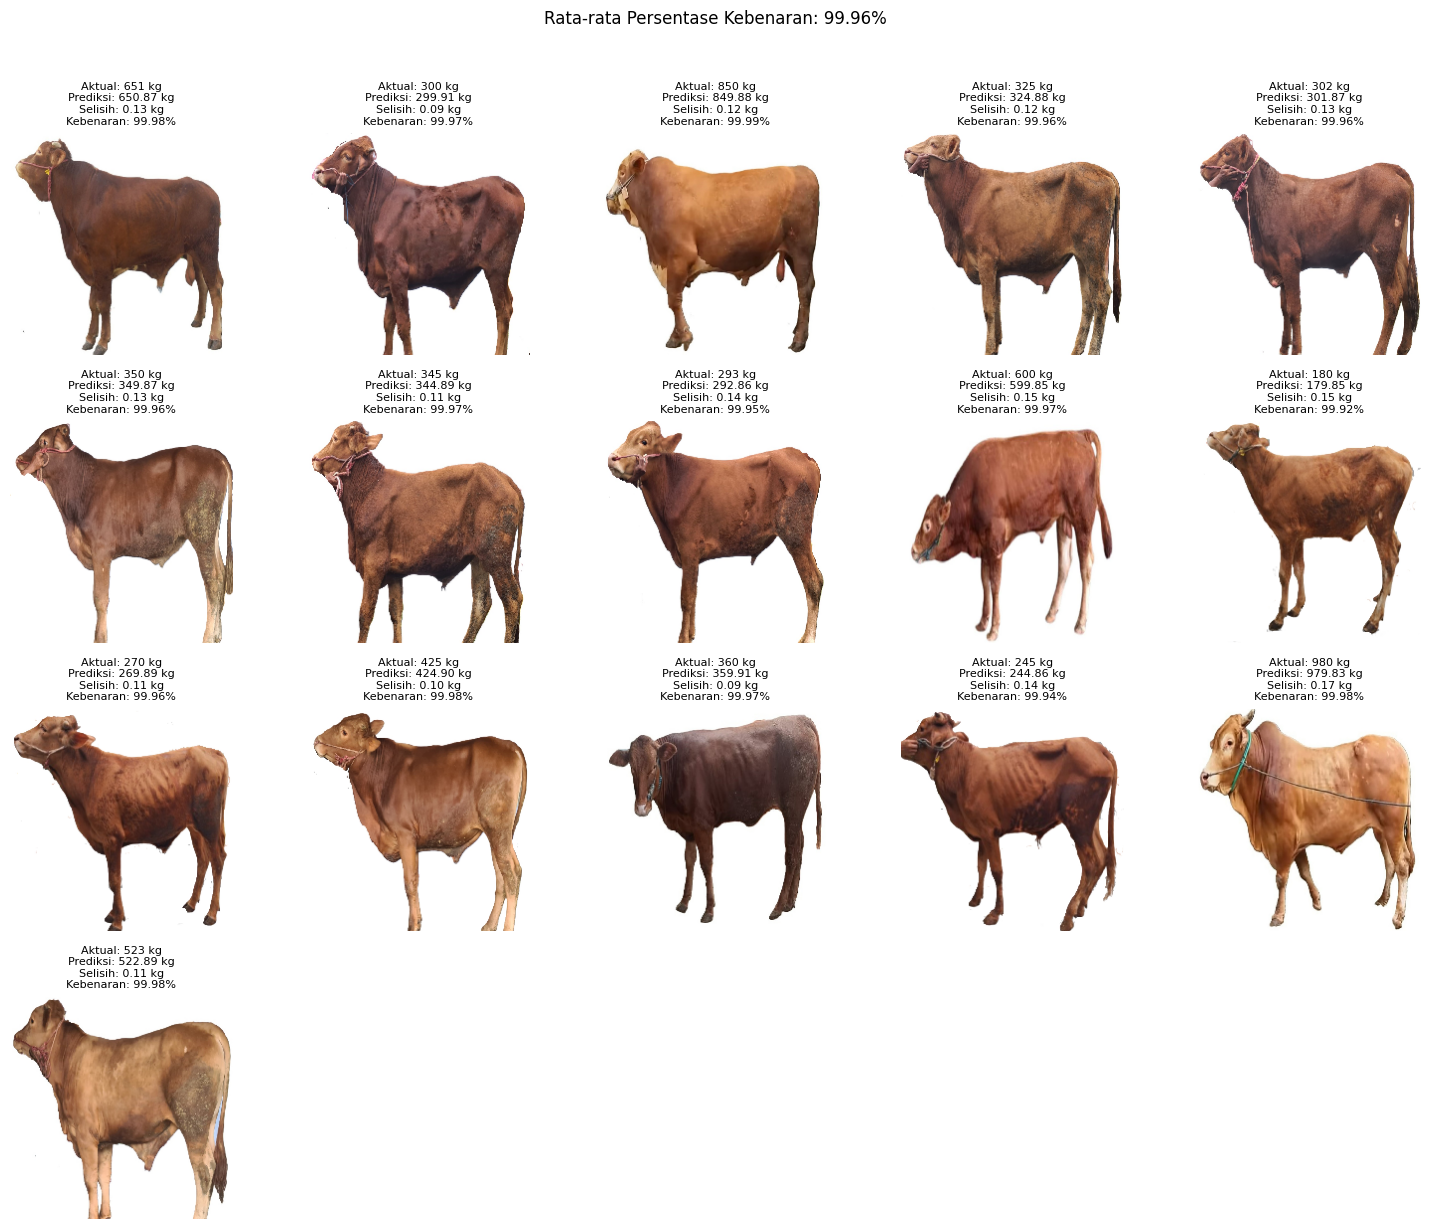

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import math

test_zip_path = '/content/dataset2.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

image_dir = '/content/dataset2'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)


best_model = tf.keras.models.load_model('best_model.h5')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

File berhasil diekstrak ke /content/


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


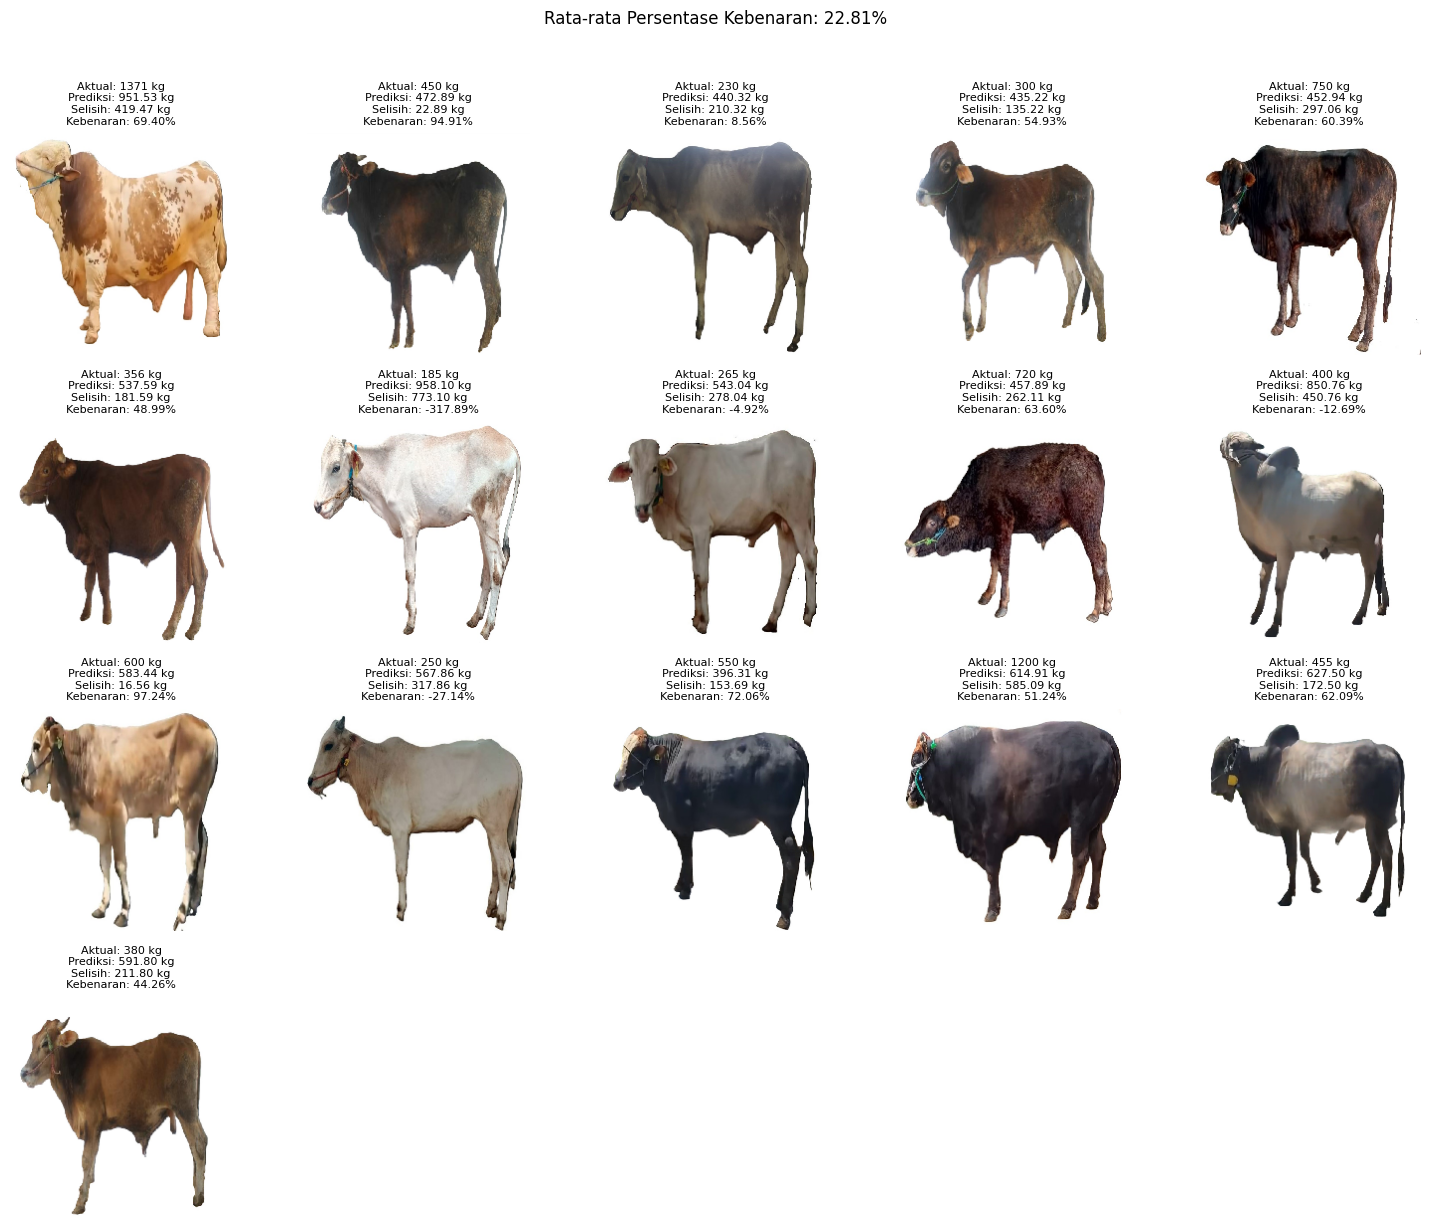

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import math

test_zip_path = '/content/test_dataset.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

image_dir = '/content/test_dataset'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)


best_model = tf.keras.models.load_model('best_model.h5')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

File berhasil diekstrak ke /content/


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


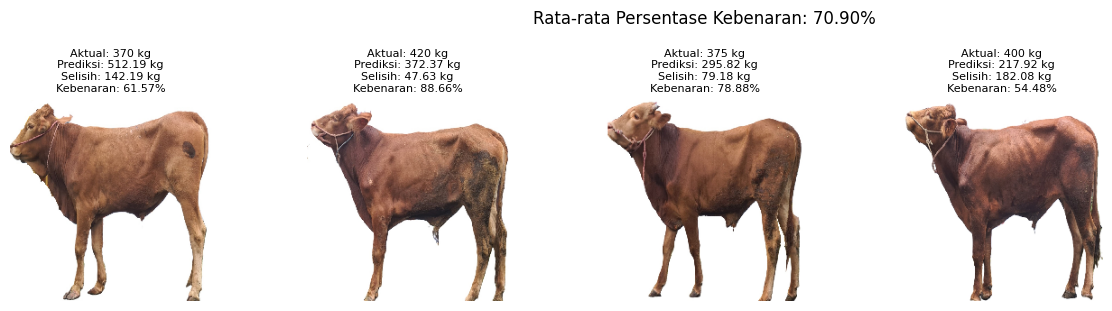

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import math

test_zip_path = '/content/test.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

image_dir = '/content/test'

images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

X = np.array(images)
y = np.array(labels)


best_model = tf.keras.models.load_model('best_model.h5')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()